In [132]:
import seaborn as sns
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch #pytorch
import torch.nn as nn
from torch.autograd import Variable
from sklearn import linear_model
from sklearn.svm import SVC  

In [2]:
import pandas as pd
import numpy as np
import re
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
import nltk
from gensim.models import Word2Vec, KeyedVectors
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pd.set_option('display.max_columns', 1000)

In [4]:
train_df = pd.read_csv('train.csv')
print('Train DF: \n', train_df.head(10), '\n', train_df.describe())

Train DF: 
    id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   
5   8     NaN      NaN  #RockyFire Update => California Hwy. 20 closed...   
6  10     NaN      NaN  #flood #disaster Heavy rain causes flash flood...   
7  13     NaN      NaN  I'm on top of the hill and I can see a fire in...   
8  14     NaN      NaN  There's an emergency evacuation happening now ...   
9  15     NaN      NaN  I'm afraid that the tornado is coming to our a...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
5       1  
6       1  
7       1  
8       1  
9       1   
       

In [5]:
train_df[train_df["target"] == 1]["text"].values[1]

'Forest fire near La Ronge Sask. Canada'

In [6]:
train_df[train_df["target"] == 0]["text"].values[1]

'I love fruits'

In [7]:
count_vectorizer = feature_extraction.text.CountVectorizer()
example_train_vectors = count_vectorizer.fit_transform(train_df["text"][0:5])
print(example_train_vectors[0].todense().shape)
print(example_train_vectors[0].todense())

(1, 54)
[[0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0]]


In [8]:
train_vectors = count_vectorizer.fit_transform(train_df["text"])
clf = linear_model.RidgeClassifier()

In [9]:
scores = model_selection.cross_val_score(clf, train_vectors, train_df["target"], cv=3, scoring="f1")
scores

array([0.59453669, 0.5642787 , 0.64082434])

In [10]:
clf.fit(train_vectors, train_df["target"])

RidgeClassifier()

In [11]:
def remove_urls(text, replacement_text=""):
    # Define a regex pattern to match URLs
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
 
    # Use the sub() method to replace URLs with the specified replacement text
    text_without_urls = url_pattern.sub(replacement_text, text)
 
    return text_without_urls
 

In [12]:
def remove_html_tags(text):
    """Remove html tags from a string"""
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [13]:
train_df["cleaned_text"] = train_df["text"].apply(lambda x: remove_urls(x))
train_df["cleaned_text"] = train_df["cleaned_text"].apply(lambda x: remove_html_tags(x))
train_df["cleaned_text"] = train_df["cleaned_text"].apply(lambda x: x.lower())
train_df["cleaned_text"] = train_df["cleaned_text"].apply(lambda x: ''.join(letter for letter in x if (letter.isalnum()) or letter == ' '))
display(train_df["cleaned_text"].tail(10))

7603    officials say a quarantine is in place at an a...
7604    worldnews fallen powerlines on glink tram upda...
7605    on the flip side im at walmart and there is a ...
7606    suicide bomber kills 15 in saudi security site...
7607    stormchase violent record breaking ef5 el reno...
7608    two giant cranes holding a bridge collapse int...
7609    ariaahrary thetawniest the out of control wild...
7610                m194 0104 utc5km s of volcano hawaii 
7611    police investigating after an ebike collided w...
7612    the latest more homes razed by northern califo...
Name: cleaned_text, dtype: object

In [14]:
train_df.to_csv('train_cleaned.csv')

In [15]:
def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    # converts the words in word_tokens to lower case and then checks whether 
    #they are present in stop_words or not
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    #with no lower case conversion
    filtered_sentence = []
     
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    return filtered_sentence

In [16]:
train_df["text_without_stop_words"] = train_df["cleaned_text"].apply(lambda x: remove_stop_words(x))
train_df["text_without_stop_words"]

0       [deeds, reason, earthquake, may, allah, forgiv...
1           [forest, fire, near, la, ronge, sask, canada]
2       [residents, asked, shelter, place, notified, o...
3       [13000, people, receive, wildfires, evacuation...
4       [got, sent, photo, ruby, alaska, smoke, wildfi...
                              ...                        
7608    [two, giant, cranes, holding, bridge, collapse...
7609    [ariaahrary, thetawniest, control, wild, fires...
7610                [m194, 0104, utc5km, volcano, hawaii]
7611    [police, investigating, ebike, collided, car, ...
7612    [latest, homes, razed, northern, california, w...
Name: text_without_stop_words, Length: 7613, dtype: object

In [18]:
def lemmatize(list):
    wnl = WordNetLemmatizer()
    lemmatized_list = []
    for words in list:
        lemmatized_list.append(wnl.lemmatize(words))
    return lemmatized_list
    

In [19]:
train_df["text_lemmatized"] = train_df["text_without_stop_words"].apply(lambda x: lemmatize(x))
train_df["text_lemmatized"]

0       [deed, reason, earthquake, may, allah, forgive...
1           [forest, fire, near, la, ronge, sask, canada]
2       [resident, asked, shelter, place, notified, of...
3       [13000, people, receive, wildfire, evacuation,...
4       [got, sent, photo, ruby, alaska, smoke, wildfi...
                              ...                        
7608    [two, giant, crane, holding, bridge, collapse,...
7609    [ariaahrary, thetawniest, control, wild, fire,...
7610                [m194, 0104, utc5km, volcano, hawaii]
7611    [police, investigating, ebike, collided, car, ...
7612    [latest, home, razed, northern, california, wi...
Name: text_lemmatized, Length: 7613, dtype: object

In [21]:
train_vectors = count_vectorizer.fit_transform(train_df["text"])
clf = linear_model.RidgeClassifier()
scores = model_selection.cross_val_score(clf, train_vectors, train_df["target"], cv=3, scoring="f1")
scores

array([0.59453669, 0.5642787 , 0.64082434])

In [22]:
train_vectors = count_vectorizer.fit_transform(train_df["text_lemmatized"].apply(lambda x: ' '.join(x)))
clf = linear_model.RidgeClassifier()
scores = model_selection.cross_val_score(clf, train_vectors, train_df["target"], cv=3, scoring="f1")
scores

array([0.60934183, 0.51724138, 0.61166008])

In [23]:
combined_text = train_df['text_lemmatized'].tolist()
# Model parameters
model= Word2Vec(window=5, min_count=2, workers=4, sg=0)

# Train the model
model.build_vocab(train_df["text_lemmatized"], progress_per=1000)
model.train(train_df["text_lemmatized"], total_examples=model.corpus_count, epochs=model.epochs)

# Save the trained model

model.save("./responses.model")

In [24]:
model.wv["fire"]

array([-0.5788537 ,  0.74728173,  0.39691573,  0.32670757,  0.14303273,
       -1.1326792 ,  0.15574451,  1.2098734 , -0.3801662 , -0.10816902,
       -0.5538319 , -1.0985172 ,  0.00691986,  0.1518504 ,  0.1515967 ,
       -0.47684717, -0.3374292 , -0.8476107 ,  0.26388523, -1.2414052 ,
        0.39737815,  0.4645385 ,  0.13417327, -0.13505371,  0.00834606,
       -0.15910245, -0.4512405 , -0.3714893 , -0.672491  , -0.20646267,
        0.74435556,  0.34034446,  0.02793392, -0.29880533, -0.33525643,
        0.5524746 , -0.23145346, -0.2690242 , -0.00928138, -0.8899725 ,
        0.0032404 , -0.52359265, -0.27423868,  0.4350879 ,  0.35619497,
       -0.64601284, -0.8567809 ,  0.08356956,  0.25650513,  0.5325405 ,
        0.29611638, -0.34543923, -0.22362086, -0.08604631, -0.4005064 ,
        0.23752858,  0.1612791 , -0.23995835, -0.6043087 ,  0.05591371,
        0.018518  ,  0.28254098, -0.64065164, -0.02568102, -0.7193034 ,
        0.4222317 , -0.00177116,  0.64594257, -0.64182997,  0.22

In [25]:
def get_sentence_vector(sentence, model):
    words = [word for word in sentence if word in model.wv]
    if not words:
        return np.zeros(model.vector_size)
    word_vectors = [model.wv[word] for word in words]
    sentence_vector = np.mean(word_vectors, axis=0)
    return sentence_vector

In [26]:
model = Word2Vec.load("./responses.model")
train_df['vectors'] = train_df["text_without_stop_words"].apply(lambda x: np.array(get_sentence_vector(x, model)))
train_df['vectors'].head()
# print(train_df['vectors'][0])

0    [-0.11681796, 0.14682288, 0.07759399, 0.061216...
1    [-0.23129669, 0.30641368, 0.15825656, 0.129312...
2    [-0.081504874, 0.096373074, 0.047878105, 0.039...
3    [-0.21810322, 0.27213567, 0.14371605, 0.121036...
4    [-0.15835875, 0.20373003, 0.11084189, 0.085059...
Name: vectors, dtype: object

In [56]:
# Select ratio
# ratio = 0.8
 
# total_rows = train_df.shape[0]
# train_size = int(total_rows*ratio)
 
# # Split data into test and train
# train = train_df[['target']][0:train_size]
# test = train_df[train_size:]
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming train_df is your DataFrame and it contains a 'target' column
ratio = 0.8

# Perform the stratified split
train_df_features = train_df.drop(columns=['target'])
train_df_target = train_df['target']

X_train1, X_test1, y_train1, y_test1 = train_test_split(train_df_features, train_df_target, train_size=ratio, stratify=train_df_target, random_state=42)

# Combine X and y back for train and test sets
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

print("Training set:")
print(train['target'].value_counts(normalize=True))
print("Test set:")
print(test['target'].value_counts(normalize=True))

Training set:
0    0.570279
1    0.429721
Name: target, dtype: float64
Test set:
0    0.570584
1    0.429416
Name: target, dtype: float64


In [57]:
model = RandomForestClassifier(n_estimators = 50,
                               random_state = 42)
train_vectors = np.stack(train['vectors'].values)
test_vectors = np.stack(test['vectors'].values)
train_targets = train['target'].values
test_targets = test['target'].values

model.fit(train_vectors, train_targets)
model_predict = model.predict(test_vectors)
print(classification_report(test_targets, model_predict))

              precision    recall  f1-score   support

           0       0.68      0.84      0.75       869
           1       0.69      0.49      0.57       654

    accuracy                           0.69      1523
   macro avg       0.69      0.66      0.66      1523
weighted avg       0.69      0.69      0.67      1523



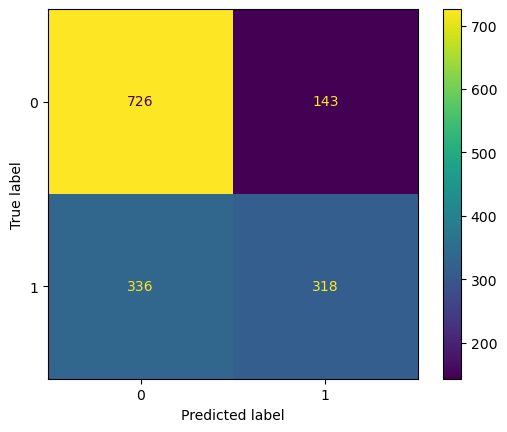

In [58]:
cm = confusion_matrix(test_targets, model_predict, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [41]:
logr = linear_model.LogisticRegression()
logr.fit(train_vectors, train_targets)
lr_predicted = logr.predict(test_vectors)
print(lr_predicted)
print(classification_report(test_targets, lr_predicted))

[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       869
           1       0.00      0.00      0.00       654

    accuracy                           0.57      1523
   macro avg       0.29      0.50      0.36      1523
weighted avg       0.33      0.57      0.41      1523



C:\Users\Mahmoud Hisham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mahmoud Hisham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mahmoud Hisham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


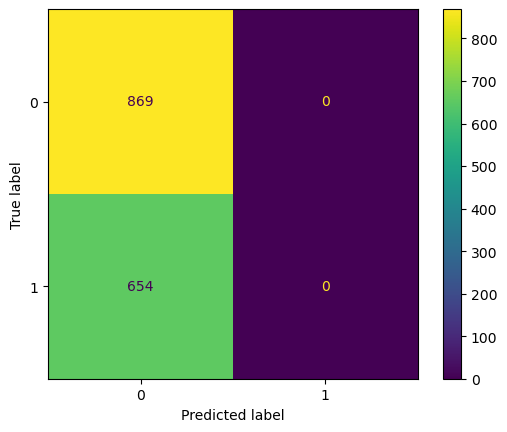

In [42]:
cm = confusion_matrix(test_targets, lr_predicted, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [43]:
svm_clf = SVC(kernel='linear') 
 
# fitting x samples and y classes 
svm_clf.fit(train_vectors, train_targets) 
svm_predicted = svm_clf.predict(test_vectors)
print(svm_predicted)
print(classification_report(test_targets, svm_predicted))

[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       869
           1       0.00      0.00      0.00       654

    accuracy                           0.57      1523
   macro avg       0.29      0.50      0.36      1523
weighted avg       0.33      0.57      0.41      1523



C:\Users\Mahmoud Hisham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mahmoud Hisham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mahmoud Hisham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


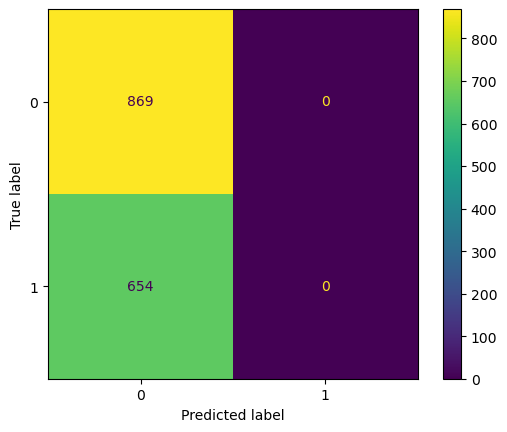

In [45]:
cm = confusion_matrix(test_targets, svm_predicted, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [59]:
X_train_tensors = Variable(torch.Tensor(train_vectors))
X_test_tensors = Variable(torch.Tensor(test_vectors))

y_train_tensors = Variable(torch.Tensor(train_targets))
y_test_tensors = Variable(torch.Tensor(test_targets)) 

X_train_tensors_final = torch.reshape(X_train_tensors,   (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))
X_test_tensors_final = torch.reshape(X_test_tensors,  (X_test_tensors.shape[0], 1, X_test_tensors.shape[1]))

print("Training Shape", X_train_tensors_final.shape, y_train_tensors.shape)
print("Testing Shape", X_test_tensors_final.shape, y_test_tensors.shape) 

Training Shape torch.Size([6090, 1, 100]) torch.Size([6090])
Testing Shape torch.Size([1523, 1, 100]) torch.Size([1523])


In [148]:
class LSTM1(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM1, self).__init__()
        self.num_classes = num_classes #number of classes
        self.num_layers = num_layers #number of layers
        self.input_size = input_size #input size
        self.hidden_size = hidden_size #hidden state
        self.seq_length = seq_length #sequence length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True) #lstm
        self.fc_1 =  nn.Linear(hidden_size, 128) #fully connected 1
        self.fc_2 =  nn.Linear(128, 32) #fully connected 1
        
        self.fc = nn.Linear(128, 1) #fully connected last layer

        self.relu = nn.ReLU()
    
    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #hidden state
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #internal state
        # Propagate input through LSTM
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state
        # hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next
        out = self.relu(hn)
        out = self.fc_1(out) #first Dense
        out = self.relu(out) #relu
        
        # out = self.fc_2(out) #first Dense
        # out = self.relu(out) #relu
        
        out = self.fc(out) #Final Output
        return out

In [149]:
num_epochs = 1000 #1000 epochs
learning_rate = 0.001 #0.001 lr

input_size = 100 #number of features
hidden_size = 100 #number of features in hidden state
num_layers = 1 #number of stacked lstm layers

num_classes = 1 #number of output classes 

In [150]:
lstm1 = LSTM1(num_classes, input_size, hidden_size, num_layers, X_train_tensors_final.shape[1]) #our lstm class
lstm1

LSTM1(
  (lstm): LSTM(100, 100, batch_first=True)
  (fc_1): Linear(in_features=100, out_features=128, bias=True)
  (fc_2): Linear(in_features=128, out_features=32, bias=True)
  (fc): Linear(in_features=128, out_features=1, bias=True)
  (relu): ReLU()
)

In [154]:
pos_weight = torch.tensor([2.0])

criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.Adam(lstm1.parameters(), lr=learning_rate) 
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.5)

In [ ]:
for epoch in range(5000):
  outputs = lstm1.forward(X_train_tensors_final) #forward pass
  optimizer.zero_grad() #caluclate the gradient, manually setting to 0
 
  # obtain the loss function
  loss = criterion(outputs, y_train_tensors.view(1, -1, 1))
  loss.backward() #calculates the loss of the loss function
 
  optimizer.step() #improve from loss, i.e backprop
  if epoch % 10 == 0:
    print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.76632
Epoch: 10, loss: 0.81946
Epoch: 20, loss: 0.79361
Epoch: 30, loss: 0.77695
Epoch: 40, loss: 0.76816
Epoch: 50, loss: 0.76715
Epoch: 60, loss: 0.76517
Epoch: 70, loss: 0.76438
Epoch: 80, loss: 0.76407
Epoch: 90, loss: 0.76397
Epoch: 100, loss: 0.76386
Epoch: 110, loss: 0.76379
Epoch: 120, loss: 0.76372
Epoch: 130, loss: 0.76367
Epoch: 140, loss: 0.76360
Epoch: 150, loss: 0.76355
Epoch: 160, loss: 0.76347
Epoch: 170, loss: 0.76340
Epoch: 180, loss: 0.76334
Epoch: 190, loss: 0.76327
Epoch: 200, loss: 0.76321
Epoch: 210, loss: 0.76313
Epoch: 220, loss: 0.76306
Epoch: 230, loss: 0.76300
Epoch: 240, loss: 0.76292
Epoch: 250, loss: 0.76288
Epoch: 260, loss: 0.76281
Epoch: 270, loss: 0.76270
Epoch: 280, loss: 0.76263
Epoch: 290, loss: 0.76254
Epoch: 300, loss: 0.76248
Epoch: 310, loss: 0.76237
Epoch: 320, loss: 0.76229
Epoch: 330, loss: 0.76225
Epoch: 340, loss: 0.76213
Epoch: 350, loss: 0.76202
Epoch: 360, loss: 0.76195
Epoch: 370, loss: 0.76186
Epoch: 380, loss: 0.761

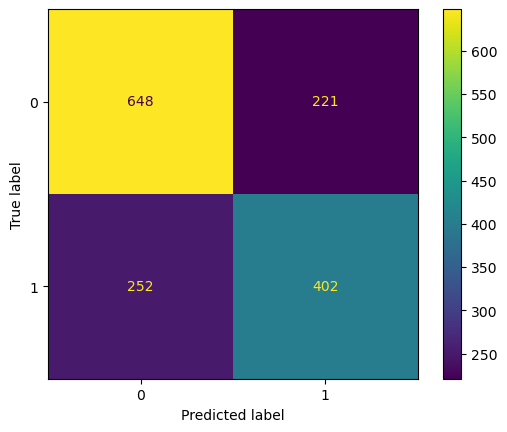

In [153]:
y_pred = []
y_true = []

# Reshape the input tensors to the shape (batch_size, sequence_length, input_size)
X_test_tensors_final = torch.reshape(X_test_tensors, (X_test_tensors.shape[0], 1, X_test_tensors.shape[1]))

# Create a DataLoader for batch processing
test_dataset = TensorDataset(X_test_tensors_final, y_test_tensors)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)
i =0 
# Iterate over test data
for inputs, labels in test_loader:
    output = lstm1(inputs)  # Feed Network

    # Apply threshold to get binary output
    predicted = (output > 0.5).float().cpu().numpy()
    y_pred.extend(predicted)  # Save Prediction

    labels = labels.data.cpu().numpy()
    y_true.extend(labels)  # Save Truth
    # i +=1
    # print(i, predicted, labels)


y_pred = np.array(y_pred).flatten()  # Flatten in case the predictions are nested
y_true = np.array(y_true).flatten()  # Flatten in case the labels are nested

# Build confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
# plt.show()
